# Assignment #5 - Deep Learning (Extra Credits)

### <font color="red"> DUE: Dec 7 (Monday) 11:00 pm </font>  

<font color="blue"> Akshay Patil </font>

In [1]:
#Starting the timer for execution of the model
import timeit
start_time = timeit.default_timer()
start_time

1.199186792

# I. Overview

The obective of this assignment is to understand what is deep learning and how can we impement it using Tensorflow or Keras as instructed to us. I have used Keras in this assignment to implement deep learning. The data has been preprocessed and visualized and nomralized to be used ahead. I have used the Sequential model in Keras to create different neural network structures which have been implemented in this assignment.

# II. Data

##  Bank Marketing Dataset

The data set which has been used is a Bank Marketing Dataset which is a record of all the marketing dont by the bank to get customers to deposit money in their bank. This data set is having 11162 rows and 17 columns.This dataset has a binary variable deposit (Yes = yes, No = no) as target variable.The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

https://www.kaggle.com/janiobachmann/bank-marketing-dataset

## Reading the data

The data set is csv file. It is uploaded using pandas module. The data set contains more than 10,000 instances and 17 features in total. 

In [2]:
#Importing modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bank.csv")

# Pre Processing of the data.
As we can see there are NaN values present. There are also duplicate values present. So we delete those instances, and we are left with almost 30,000 instances

In [3]:
df1 = df
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df1 = df1.drop(columns=['default', 'loan','contact','poutcome','job','previous','pdays'])

In [6]:
encoding_dict = {"marital" : {"single":1 , "married":2 , "divorced":3},
                 "housing" : {"no": -1 , "yes": 1},
                 "month" : {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                 "deposit": {"no":0,"yes":1},
                 "education" :{"unknown":0,"primary":1,"secondary":2,"tertiary":3}
                }

In [7]:
df1.replace(encoding_dict, inplace = True)
df1.head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
0,59,2,2,2343,1,5,5,1042,1,1
1,56,2,2,45,-1,5,5,1467,1,1
2,41,2,2,1270,1,5,5,1389,1,1
3,55,2,2,2476,1,5,5,579,1,1
4,54,2,3,184,-1,5,5,673,2,1


# Data Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
groupName = []                                    #making different groups of genders to be plotted ahead
count = []
for group_name, subset in df1.groupby('education'):
    groupName.append(group_name)
    count.append(len(subset))
print(groupName)
print(count)

[0, 1, 2, 3]
[497, 1500, 5476, 3689]


Text(0.5, 1.0, 'Campaign Count Plot')

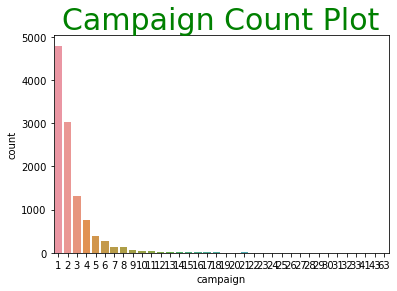

In [10]:
sns.countplot(df1.campaign)
plt.title("Campaign Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Marriage Count Plot')

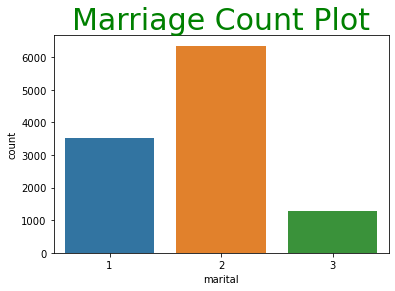

In [11]:
sns.countplot(df1.marital)
plt.title("Marriage Count Plot", color = 'green', fontsize = 30)

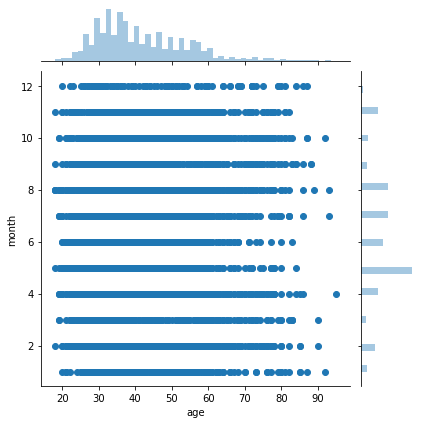

In [12]:
sns.jointplot(df1['age'],df1['month'])

Text(0.5, 1.0, 'Marriage Age Count Plot')

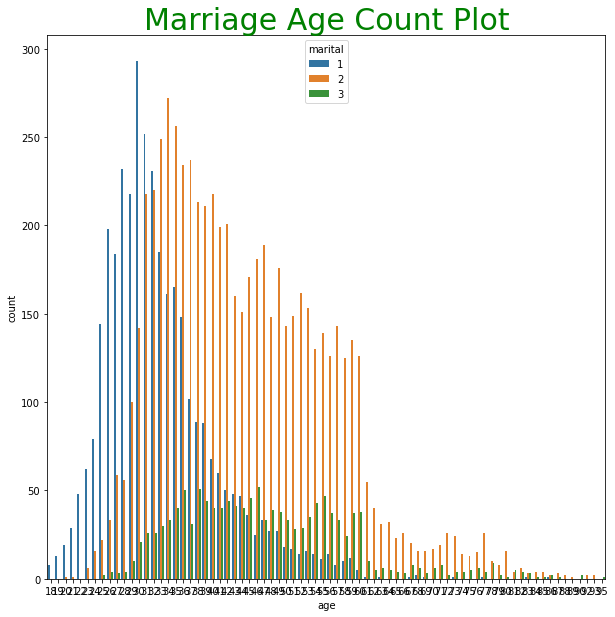

In [13]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df1['age'],hue=df1['marital'])
plt.title("Marriage Age Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Age Deposit Count Plot')

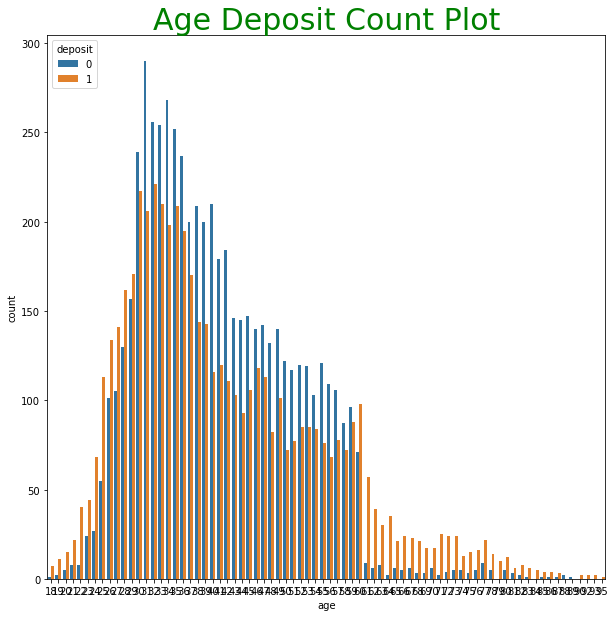

In [14]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df1['age'],hue=df1['deposit'])
plt.title("Age Deposit Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Marriage Deposit Count Plot')

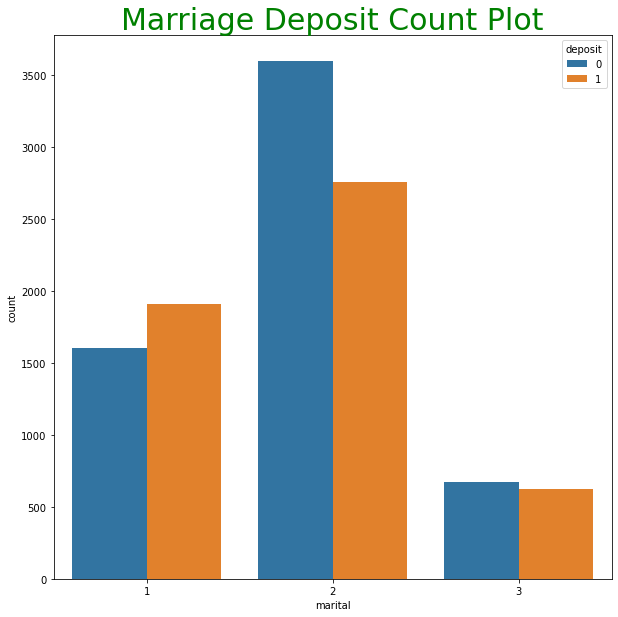

In [15]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df1['marital'],hue=df1['deposit'])
plt.title("Marriage Deposit Count Plot", color = 'green', fontsize = 30)

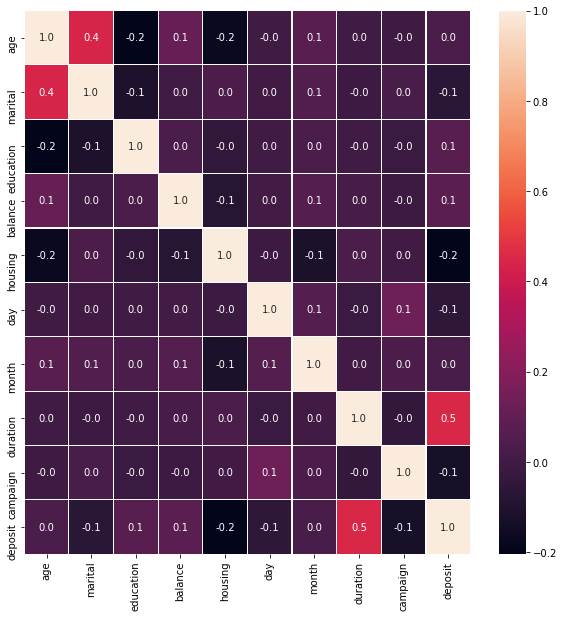

In [16]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

## Preliminary Observation

Visualization of data has been performed above and the following are the observations that we can observe from the visualizations performed above

1. There are a large number of people who have secondary education compared to the other people in this particular dataset. Around 50 % of the people have secondary education as we can see from the pie diagram above.

2. We can see that a lot of different campaigns were used to do the marketing of the the schemes the bank had for the customers.However predominantly campaign 1 has been used extensively in this particualar dataset.

3. We can see that we have a mix of three types of people in terms of marital status. Among the large number of people that we have a large portion of them are married followed by single people and then divorced people.

4. We can see in the age month plot that most people who have been contacted by the bank are in the range of 25 to 45 and most of them have been contacted in the month of May

5. The marriage age plot shows us how the age of the people coupled along with their marital status. The following Age deposit plot shows us the age of the people coupled with their decision to deposit or not.

6. The Marriage deposit plot shows the marital status coupled along with the deposit and we can observe that married people are more likely to deposit in the bank followed by single and then the divorced people.

7. The heat map shows the degree of correlation that exists between the different feature vvariables present in the dataset as it can be observed in the above heatmap

# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 



There are a lot of different neural networks as you see in the figure below. The image is just for your reference but you **are not required** to implement any other types of neurons such as LSTM, CNN, etc. You are fine to use basic neurons with different number of layers and hidden units to fulfil the requirement of this assignment.

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />



## Explanation of the choice for different neural network structures and reason for the selection.

In this assignment I have used the Sequential model in Keras to implement different neural network structures. In the sequential model in Keras we can create different neural network strcutures by changing the number of neurons for each activation fucntion that has been used. Also we have different types of optimizers which I have used to understand and implement the sequential model in Keras.

Below are the main reasons to choose Keras(Sequencial) for the implementation of neural network:-

- I have used Sequential API of the keras to build neural network model. The sequential API allows to create models layer-by-layer. But the there is a limitation of the sequenatial that it does not allow you to create models that share layers. In my implementation, I am not going to use any share layered architecture and hence I decided to use Sequencial modelling over functional modelling of Keras.

- 'Sequential' API is a linear stack of layers and this model can be created by passing a list of layer instances to the constructor.

- Another reason to choose keras over tensorflow is the flexibility and simplicity of the keras. Keras provides functionalities which simplifies the implementation of the deep learning neural network and at the same time, we can build complex network.

- As we don't want to perform research on any model, instead we just want to implement pre-defined models with different models by changing hyperparamters, I chose to use keras instead of Tensorflow. But if low level changes in the model are needed then Tensorflow provides more robust functionalities.


In this assignment I have used different combination of activation function as well as differrent number of neurons in each layer to find best accuracy.


In total I have built 9 different models.
There are three different set of architecture with varying neurons , and for each architechture I have used different activation function like tanh,sigmoid and relu. ( Activation function will be same in all the layers)

The reason for choosing such different structures and activation function is that since I am doing this for first time I want to see how models behave for different structures.

The neurons used in the layers are in decreasing, increasing and alternate format.


In [17]:
import tensorflow as tf


import keras
from keras import models, layers, losses, optimizers, metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

In [18]:
df1.head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
0,59,2,2,2343,1,5,5,1042,1,1
1,56,2,2,45,-1,5,5,1467,1,1
2,41,2,2,1270,1,5,5,1389,1,1
3,55,2,2,2476,1,5,5,579,1,1
4,54,2,3,184,-1,5,5,673,2,1


In [19]:
def normalize(X):
    return(X/X.max())

In [20]:
df1["month"] = normalize(df1["month"])
df1["duration"] = normalize(df1["duration"])
df1["campaign"] = normalize(df1["campaign"])
df1["day"] = normalize(df1["day"])
df1["age"] = normalize(df1["age"])
df1["marital"] = normalize(df1["marital"])
df1["education"] = normalize(df1["education"])
df1["balance"] = normalize(df1["balance"])
df1["housing"] = normalize(df1["housing"])

In [21]:
df1.head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
0,0.621053,0.666667,0.666667,0.028853,1.0,0.16129,0.416667,0.268488,0.015873,1
1,0.589474,0.666667,0.666667,0.000554,-1.0,0.16129,0.416667,0.377995,0.015873,1
2,0.431579,0.666667,0.666667,0.015640,1.0,0.16129,0.416667,0.357897,0.015873,1
3,0.578947,0.666667,0.666667,0.030491,1.0,0.16129,0.416667,0.149188,0.015873,1
4,0.568421,0.666667,1.000000,0.002266,-1.0,0.16129,0.416667,0.173409,0.031746,1


In [22]:
data = df1.sample(10000)

In [23]:
X=data.iloc[:,0:-1]
X = X.values
X.shape

(10000, 9)

In [24]:
T=data.iloc[:,-1]
T = T.values
T = T.reshape(T.shape[0],1)
T.shape

(10000, 1)

In [25]:
normalize = StandardScaler()
norm_x = normalize.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(norm_x, T, test_size=0.2, random_state=1)

In [26]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 9) (8000, 1) (2000, 9) (2000, 1)


In [27]:
def plot_history(history):
    loss = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    accuracy = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    validation_accuracy = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss:
        plt.plot(epochs, history.history[l], 'k', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss:
        plt.plot(epochs, history.history[l], 'c', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in accuracy:
        plt.plot(epochs, history.history[l], 'r', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in validation_accuracy:    
        plt.plot(epochs, history.history[l], 'm', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


Now we have our training and testing data. We can try different combination of activation function while also changing the number of neurons to get best results.

We will be building the deep neural network by initating a sequential model using an activation function, then adding up the hidden layers and an output node.



## First Set of models (neurons in decreasing format)

### Activation Function: Relu

In [28]:
neurons = [256, 128, 64, 32, 16, 8, 4, 2]

#Input Layer
model1=keras.models.Sequential()
model1.add(Dense(input_dim=9, units=9,activation='relu'))

#Hiden Layer
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='relu'))
#Output Layer       
model1.add(Dense(units= 1, activation='relu'))

model1.compile(optimizer=optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model1_train = model1.fit(X_train, y_train,batch_size = 10, epochs=10, verbose = 0, validation_data=(X_test, y_test))

In [29]:
model1_acc = model1_train.history['accuracy'][-1] * 100
print(model1_acc)

52.48749852180481


Text(0, 0.5, 'Model Accuracy')

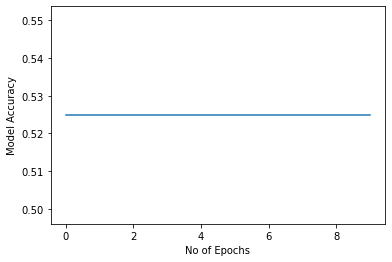

In [30]:
plt.plot(model1_train.history['accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

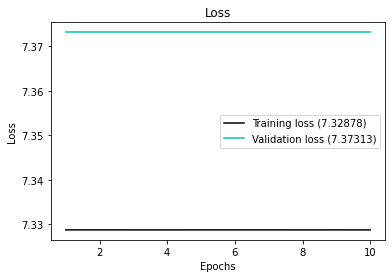

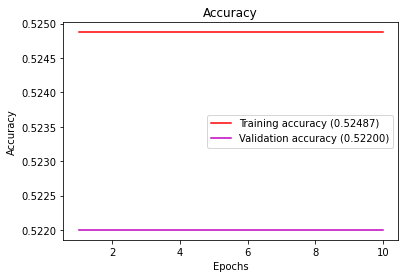

In [31]:
plot_history(model1_train)

The accuracy is very less and it can be seen ReLu activation function is not a good choice for this dataset, also the activation function for output node is RelU instead of sigmoid which we generally use for classification purposes

### Activation Function: tanh

In [32]:
neurons = [256, 128, 64, 32, 16, 8, 4, 2]

#Input Layer
model2=keras.models.Sequential()
model2.add(Dense(input_dim=9, units=9,activation='tanh'))

#Hiden Layer
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='tanh'))
#Output Layer       
model2.add(Dense(units= 1, activation='tanh'))

model2.compile(optimizer= optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model2_train = model2.fit(X_train, y_train,batch_size = 10,epochs=10, verbose = 0, validation_data=(X_test, y_test))

In [33]:
model2_acc = model2_train.history['accuracy'][-1] * 100
print(model2_acc)

77.08749771118164


Text(0, 0.5, 'Model Accuracy')

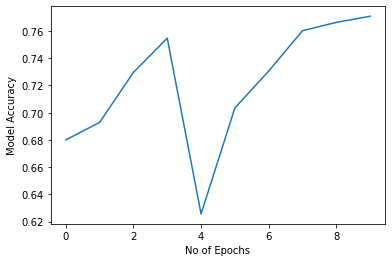

In [34]:
plt.plot(model2_train.history['accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

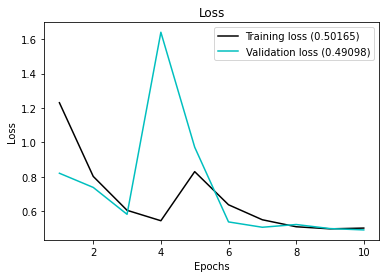

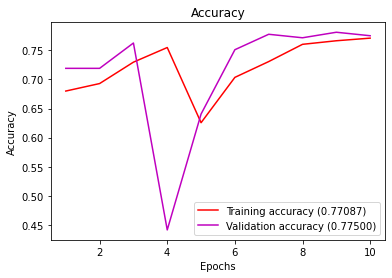

In [35]:
plot_history(model2_train)

FRom the above plots it can be seen the accuracy shows a sudden fall, an again starts increasing, similar is case with training loss. The model learns and training loss decreases the number of epochs increases.

### Activation Function: sigmoid

In [36]:
neurons = [256, 128, 64, 32, 16, 8, 4, 2]

#Input Layer
model3=keras.models.Sequential()
model3.add(Dense(input_dim=9, units=9,activation='sigmoid'))

#Hiden Layer
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='sigmoid'))
#Output Layer       
model3.add(Dense(units= 1, activation='sigmoid'))

model3.compile(optimizer= optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model3_train = model3.fit(X_train, y_train, batch_size = 10,epochs=10, verbose = 0, validation_data=(X_test, y_test))

In [37]:
model3_acc = model3_train.history['accuracy'][-1] * 100
print(model3_acc)

78.21249961853027


Text(0, 0.5, 'Model Accuracy')

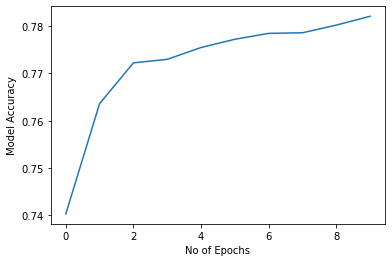

In [38]:
plt.plot(model3_train.history['accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

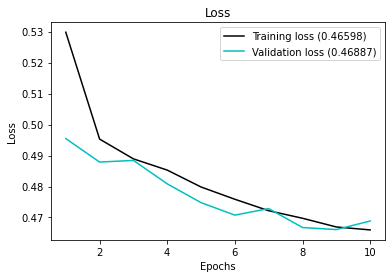

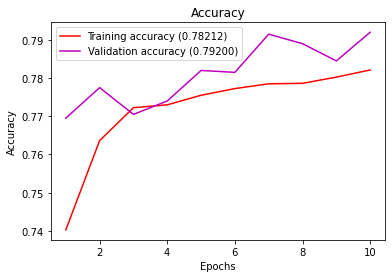

In [39]:
plot_history(model3_train)

Sigmoid activation function shows promising reult in 10 epochs,the accuraccy might increase more, if it is run for more number of epochs

### Explaination Code :-

The Sequential model has been implementated. It is a linear stack of layers and a sequantial model can be created by passing a list of layer instances to the constructor.

First declared the different neurons that I am going to use for the training.

Then created the object of the Sequential class from the keras and created the model named model1 from it.
input_dim represents the number of features I am using the training of the model. As I am using  9 features, it is set to 9.

The learning process has been configured using compile() method. 3 arguments have been passed - optimizer, binary_crossentropy and metrics.

Binary_Crosssentropy has been used as I am performing binary classification, optimizer used is 'adam'. I have used 'adam' optimizer as it combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

I am using add method of keras to add() the different hyper paramters in order to create each neural structure.
Finally, fit() function has been used for training the model. fit() function trains the model for given number of epochs that is iterations on the dataset.

First two parameters are the training input and target data. On the validation data the loss and accuracy is evaluated.

For the model1, model2, and model3 I am using 'relu', 'tanh', and 'sigmoid' as my activation function respectively for the hidden layers and the number of neurons in each layer are in decreasing order.

## Second Set of models (neurons in increasing format)

### Activation Function: Relu

In [40]:
neurons =  [2, 4, 8, 16, 32, 64, 128, 256]

#Input Layer
model4=keras.models.Sequential()
model4.add(Dense(input_dim=9, units=9,activation='relu'))

#Hiden Layer
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='relu'))
#Output Layer       
model4.add(Dense(units= 1, activation='relu'))

model4.compile(optimizer=optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model4_train = model4.fit(X_train, y_train,batch_size = 10, epochs=10, verbose = 0, validation_data=(X_test, y_test))

In [41]:
model4_acc = model4_train.history['accuracy'][-1] * 100
print(model4_acc)

75.3624975681305


Text(0, 0.5, 'Model Accuracy')

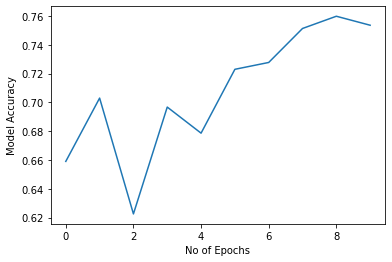

In [42]:
plt.plot(model4_train.history['accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

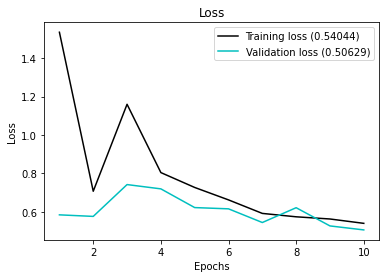

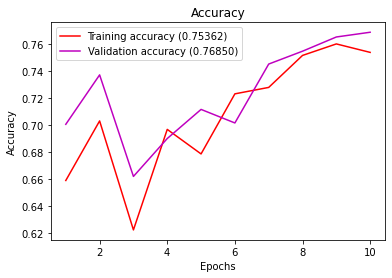

In [43]:
plot_history(model4_train)

ReLu function again behaves similary as seen above, but drastic increase and decrease in accracy. The learning parameter can be tuned down further, if this is the case. But for comparision we kept the learning rate same.

### Activation Function: tanh

In [44]:
neurons = [2, 4, 8, 16, 32, 64, 128, 256]

#Input Layer
model5=keras.models.Sequential()
model5.add(Dense(input_dim=9, units=9,activation='tanh'))

#Hiden Layer
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='tanh'))
#Output Layer       
model5.add(Dense(units= 1, activation='tanh'))

model5.compile(optimizer=optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model5_train = model5.fit(X_train, y_train,batch_size = 10, verbose = 0, epochs=10, validation_data=(X_test, y_test))

In [45]:
model5_acc = model5_train.history['accuracy'][-1] * 100
print(model5_acc)

76.66249871253967


Text(0, 0.5, 'Model Accuracy')

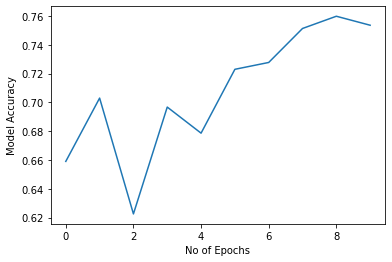

In [46]:
plt.plot(model4_train.history['accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

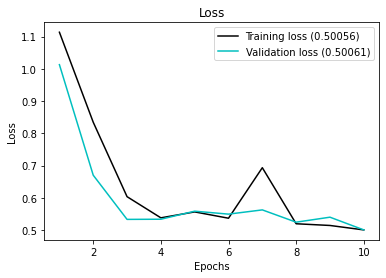

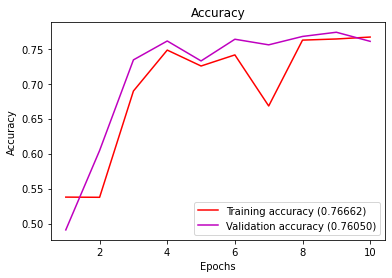

In [47]:
plot_history(model5_train)

The tanh function for this neural network shows sudden drop in training loss, this type of fall is expected for tanh activation function.

### Activation Function: sigmoid

In [48]:
neurons = [2, 4, 8, 16, 32, 64, 128, 256]

#Input Layer
model6=keras.models.Sequential()
model6.add(Dense(input_dim=9, units=9,activation='sigmoid'))

#Hiden Layer
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='sigmoid'))
#Output Layer       
model6.add(Dense(units= 1, activation='sigmoid'))

model6.compile(optimizer=optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model6_train = model6.fit(X_train, y_train, batch_size = 10,verbose = 0, epochs=18, validation_data=(X_test, y_test))

In [49]:
model6_acc = model6_train.history['accuracy'][-1] * 100
print(model6_acc)

79.07500267028809


Text(0, 0.5, 'Model Accuracy')

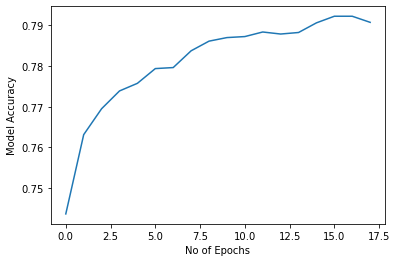

In [50]:
plt.plot(model6_train.history['accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

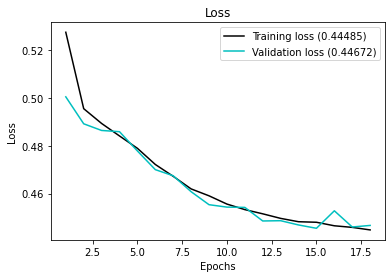

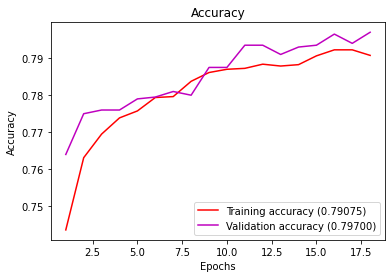

In [51]:
plot_history(model6_train)

Once again the sigmoid function shows promising result, as it can be seen from all the graphs, the accuracy (loss) might increase(decrease) more if it the model is ran for more number of epochs.

### Explaination Code :-

The Sequential model has been implementated. It is a linear stack of layers and a sequantial model can be created by passing a list of layer instances to the constructor.

First declared the different neurons that I am going to use for the training.

Then created the object of the Sequential class from the keras and created the model named model1 from it.
input_dim represents the number of features I am using the training of the model. As I am using  9 features, it is set to 9.

The learning process has been configured using compile() method. 3 arguments have been passed - optimizer, binary_crossentropy and metrics.

Binary_Crosssentropy has been used as I am performing binary classification, optimizer used is 'adam'. I have used 'adam' optimizer as it combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

I am using add method of keras to add() the different hyper paramters in order to create each neural structure.
Finally, fit() function has been used for training the model. fit() function trains the model for given number of epochs that is iterations on the dataset.

First two parameters are the training input and target data. On the validation data the loss and accuracy is evaluated.

For the model4, model5, and model 6 I am using 'relu', 'tanh', and 'sigmoid' as my activation function respectively for the hidden layers and the number of neurons in each layer are in increasing order.

## Third set of models ( neurons in alternate order)

### Activation Function: Relu

In [52]:
neurons = [16,32,64,128,64,32,16]

#Input Layer
model7=keras.models.Sequential()
model7.add(Dense(input_dim=9, units=9,activation='relu'))

#Hiden Layer
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='relu'))
#Output Layer       
model7.add(Dense(units= 1, activation='relu'))

model7.compile(optimizer=optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model7_train = model7.fit(X_train, y_train, batch_size = 10,verbose = 0, epochs=10, validation_data=(X_test, y_test))

In [53]:
model7_acc = model7_train.history['accuracy'][-1] * 100
print(model7_acc)

76.30000114440918


Text(0, 0.5, 'Model Accuracy')

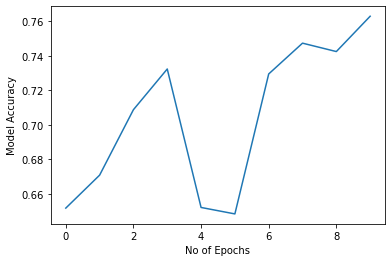

In [54]:
plt.plot(model7_train.history['accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

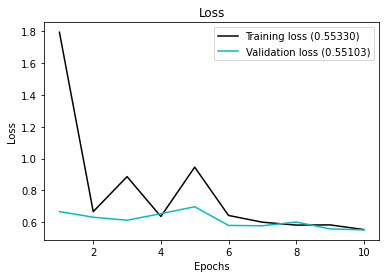

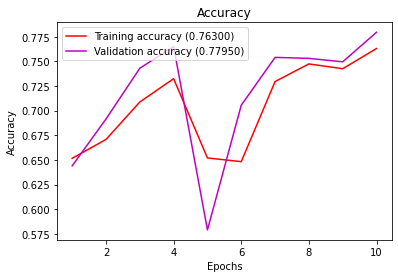

In [55]:
plot_history(model7_train)

The accuracy of the model can be seen converging and then shows sudden drop


### Activation Function: Tanh

In [56]:
neurons = [16,32,64,128,64,32,16]

#Input Layer
model8=keras.models.Sequential()
model8.add(Dense(input_dim=9, units=9,activation='tanh'))

#Hiden Layer
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='tanh'))
#Output Layer       
model8.add(Dense(units= 1, activation='tanh'))

model8.compile(optimizer=optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model8_train = model8.fit(X_train, y_train, batch_size = 10, verbose = 0, epochs=10, validation_data=(X_test, y_test))

In [57]:
model8_acc = model8_train.history['accuracy'][-1] * 100
print(model8_acc)

73.48750233650208


Text(0, 0.5, 'Model Accuracy')

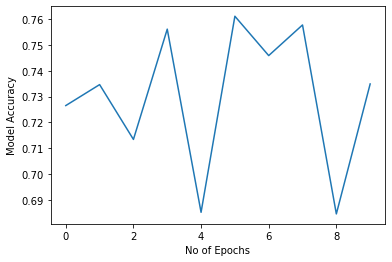

In [58]:
plt.plot(model8_train.history['accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

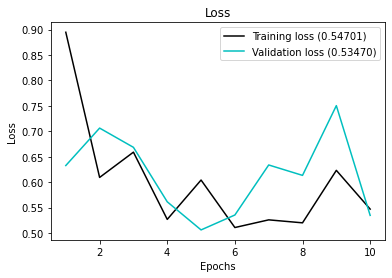

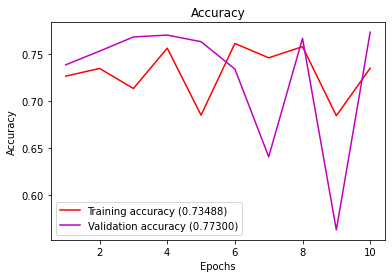

In [59]:
plot_history(model8_train)

As the number pf epochs is increasing and model is getting trained, we can see the validation accuracy shows sudden increase and decrease

### Activation Function: Sigmoid

In [60]:
neurons = [16,32,64,128,64,32,16]

#Input Layer
model9=keras.models.Sequential()
model9.add(Dense(input_dim=9, units=9,activation='sigmoid'))

#Hiden Layer
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='sigmoid'))
#Output Layer       
model9.add(Dense(units= 1, activation='sigmoid'))

model9.compile(optimizer=optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model9_train = model9.fit(X_train, y_train,batch_size = 10, verbose = 0, epochs=10, validation_data=(X_test, y_test))

In [61]:
model9_acc = model9_train.history['accuracy'][-1] * 100
print(model9_acc)

79.17500138282776


Text(0, 0.5, 'Model Accuracy')

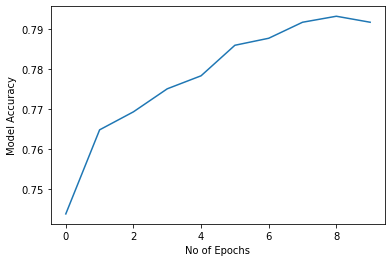

In [62]:
plt.plot(model9_train.history['accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

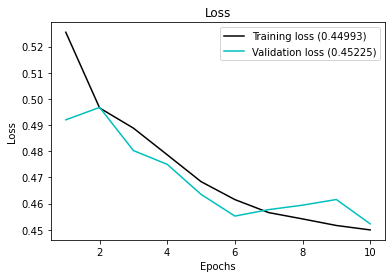

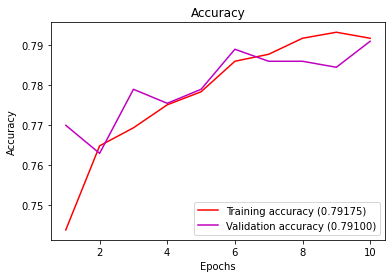

In [63]:
plot_history(model9_train)

The sigmoid activation function validation accuracy increases and decreases and then keeps on increasing as the model is trained for more number of epochs. Also, it can be seen the loss decreases as the epoch number increases. 

### Explaination Code :-

The Sequential model has been implementated. It is a linear stack of layers and a sequantial model can be created by passing a list of layer instances to the constructor.

First declared the different neurons that I am going to use for the training.

Then created the object of the Sequential class from the keras and created the model named model1 from it.
input_dim represents the number of features I am using the training of the model. As I am using  9 features, it is set to 9.

The learning process has been configured using compile() method. 3 arguments have been passed - optimizer, binary_crossentropy and metrics.

Binary_Crosssentropy has been used as I am performing binary classification, optimizer used is 'adam'. I have used 'adam' optimizer as it combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

I am using add method of keras to add() the different hyper paramters in order to create each neural structure.
Finally, fit() function has been used for training the model. fit() function trains the model for given number of epochs that is iterations on the dataset.

First two parameters are the training input and target data. On the validation data the loss and accuracy is evaluated.

For the model7, model8, and model9 I am using 'relu', 'tanh', and 'sigmoid' as my activation function respectively for the hidden layers and the number of neurons in each layer are first in increasing order and then in decreasing order

In [64]:
print('****Accuracies of each model***\n')
print("Relu_decreasing ====>", model1_acc,'\n')
print("tanh_decreasing ====>", model2_acc, '\n')
print("sigmoid_decreasing==>", model3_acc, '\n')

print("Relu_increasing ====>", model4_acc, '\n')
print("tanh_increasing ====>", model4_acc, '\n')
print("sigmoid_increasing==>", model6_acc, '\n')

print("Relu_alternate =====>", model7_acc, '\n')
print("tanh_alternate =====>", model8_acc, '\n')
print("sigmoid_alternate===>", model9_acc)

****Accuracies of each model***

Relu_decreasing ====> 52.48749852180481 

tanh_decreasing ====> 77.08749771118164 

sigmoid_decreasing==> 78.21249961853027 

Relu_increasing ====> 75.3624975681305 

tanh_increasing ====> 75.3624975681305 

sigmoid_increasing==> 79.07500267028809 

Relu_alternate =====> 76.30000114440918 

tanh_alternate =====> 73.48750233650208 

sigmoid_alternate===> 79.17500138282776


# IV - Results

I have presented the results for each of 9 models above. 
In this assignment I have tried to implement 9 different neural network structures by making an inital model and then making additions to the same by adding the neurons and hidden layers and the different activation functions being used.

For all the setof models, network with 'sigmoid' activation function performed best.

Overall model6 ('sigmoid' activation function with increasing neurons in hidden layer) performed the best among the 9 neural networks with accuracy of 79%.

The alternate model with ReLu function did not perform well, as I think activation function of output node is not sigmoid or tanh. 

I implemented these 9 models after playing around with the different things such as the neurons, hiddenlayers, activation fucntions. For each model I did try to change the batch size to 1 but it gave the similar result as with the default case. Even increasing the epoch for each model did not change the accuracy, while in some case the overall accuracy decreased as the epoch was increased. As the time is less, I was not able to explore more, like using different altogeher neural net structure. 

## What do you think about the results?

My expectation was all the models will perform differently, but most of the combinations gave almost similar result. As I develop the models further they will improve and give better accuracy. This is something which I was unable to achieve because of not exploring the neural networks enough to understand how do the models behave and how can we have the best accuracy.




# Conclusions


- This assignment helped me to understand different concepts of deep learning and also diferent activation fucntions in more depth.

- Implementation of the algorithms was pretty easy as we have used the keras directly to create the model.

- I found that the sigmoid activation function seems to be performing better on my dataset.


# References :-

https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
https://stackoverflow.com/questions/45632549/keras-accuracy-for-my-model-always-0-when-training
https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
https://keras.io/
https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search
https://keras.io/getting-started/sequential-model-guide/
https://www.quora.com/Artificial-Neural-Networks-Why-do-we-use-softmax-function-for-output-layer

In [65]:
elasped = timeit.default_timer() - start_time
elasped

129.72458214899999

## Grading

Only well-written notebook will be graded. Please follow the structure and fill in as the other assignments. 

extra credit points | description
--|:--
1 | First structure (implementation, explanation, plot results, discussion of results)
 | Second structure (implementation, explanation, plot results, discussion of results)
 | Third structure (implementation, explanation, plot results, discussion of results)
1 | Explaining and discussing the reason for the selection (Any relation to your data?)
  | Comparing the results, discuss or verify your choice 

#### Optional Extra Credits

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart above and apply it to some real data. 

### 2. Exra Credit :-

I am implementing the code on the Jupyter Notebook and CoLab - Google's platform to check the performance of the model on the GPU and on the general genral CPU.

It appears that the GPU seems to be performing better - with lesser time. Time required for the implementation of the model with higer number of neurons is lesser on the CoLab as compared to that of on general CPU.
Hence whenever we want to develop the model with higer number of neurons, it is better to use GPU for the fast processing.


### Implemenation :-

First I uploaded the csv file on git and used the raw URL to import it in the CoLab.

I created the new notebook file on the CoLab to run it on the GPU. Once I am done with these two steps, I ran the code on the CoLab as well as on the laptop(general CPU).

I have started the timer at the start of the file and ended after execution of all the models.
Then calculated the difference between start and end time. This is the total time required for the implementaion of the whole assignment.

Final results shows that the time required for the GPU is lesser than that on general CPU.


### Link for the Colab implementation:-

https://colab.research.google.com/drive/1AJUGJAFhkR74ZVRQ0qNlduf-rtWrYigD?usp=sharing

# Comparision Table of Time Required

Google Colab : 91.951951


Jupyter Notebook : 129.72458214899999
